# PERFORMANCE ASSESSMENT

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import normalized_mutual_info_score,adjusted_rand_score
from sklearn.metrics import homogeneity_score,completeness_score,silhouette_score
from sklearn.cluster import KMeans

In [89]:
labels_str = pd.read_csv("data/pbmc_labels_str.csv")
valuelbl = [5, 7, 3, 0, 4, 1, 6, 8, 2]
dictlabels = dict(zip(valuelbl, list(set(labels_str.labels))))

In [90]:
def plot_comparison(df, kmeans, xy, title1, title2):
    groups = df.groupby('label')
    fig, (ax, ax1) = plt.subplots(1,2, figsize=(20,8)) 
    
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=dictlabels[name])
    ax.set_title(title1)
    
    y_kmeans = kmeans.predict(xy)
    ax1.scatter(xy[:, 0], xy[:, 1], c=y_kmeans, s=25, cmap='viridis')
    centers = kmeans.cluster_centers_
    ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    ax1.set_title(title2)
    
    plt.show()

In [91]:
def measure_performance_scores(predicted, true):
    
    NMI = normalized_mutual_info_score(true, predicted)
    RAND = adjusted_rand_score(true, predicted)
    HOMO = homogeneity_score(true, predicted)
    COMPLETENESS = completeness_score(true, predicted)

    return {"NMI": NMI,"RAND":RAND,"HOMOGENEITY":HOMO, "COMPLETENESS":COMPLETENESS}

In [92]:
# Read the dataframe
file_name = "DF_Deepautoencoder.pkl"
df = pd.read_pickle(file_name)
n_clusters = 9
 
# The true classes
true = np.asarray(df.label)

# The predicted clusters
x = np.vstack(df.x)
y = np.vstack(df.y)
xy = np.concatenate((x,y), axis=1)
kmeans = KMeans(n_clusters, n_init=100).fit(xy)
predicted = kmeans.labels_

In [94]:
print(measure_performance_scores(predicted, true))

{'NMI': 0.7207575036146381, 'RAND': 0.5794622434025613, 'HOMOGENEITY': 0.7702727830809911, 'COMPLETENESS': 0.674425204197021}


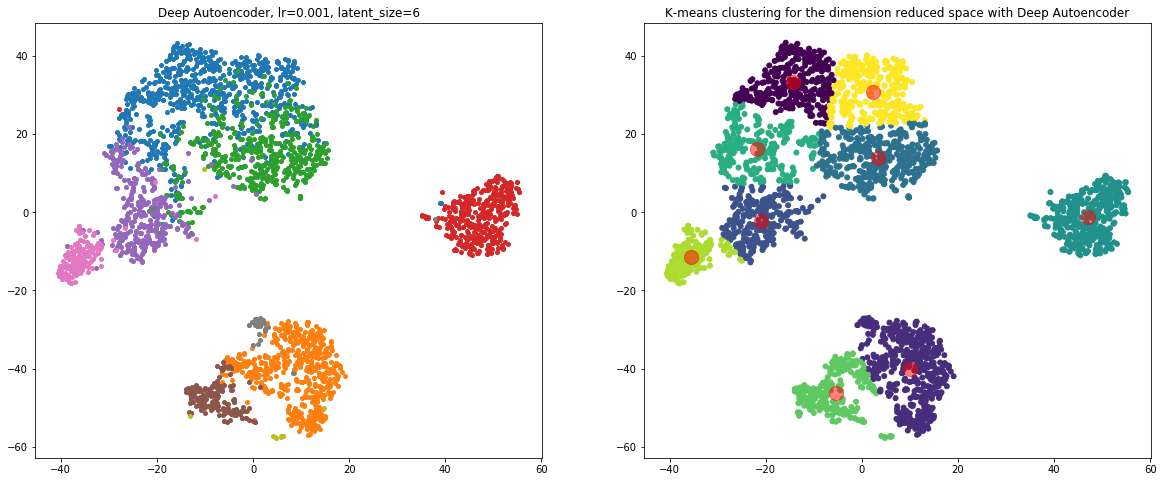

In [95]:
# Visualizations
title1 = 'Deep Autoencoder, lr=0.001, latent_size=6'
title2 = 'K-means clustering for the dimension reduced space with Deep Autoencoder'
plot_comparison(df, kmeans, xy, title1, title2)


In [96]:
## SECOND MODEL ##

# Read the dataframe
file_name = "DF_BVAE.pkl"
df = pd.read_pickle(file_name)
n_clusters = 9
 
# The true classes
true = np.asarray(df.label)

# The predicted clusters
x = np.vstack(df.x)
y = np.vstack(df.y)
xy = np.concatenate((x,y), axis=1)
kmeans = KMeans(n_clusters, n_init=100).fit(xy)
predicted = kmeans.labels_

In [98]:
print(measure_performance_scores(predicted, true))

{'NMI': 0.6090040710198986, 'RAND': 0.4400458203957231, 'HOMOGENEITY': 0.654050346361292, 'COMPLETENESS': 0.5670602585598743}


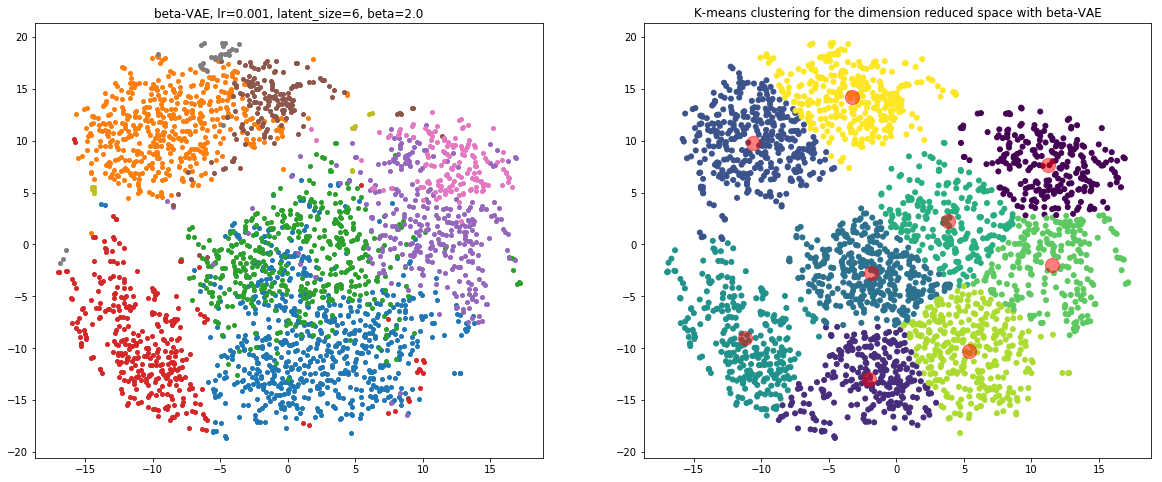

In [99]:
# Visualizations
title1 = "beta-VAE, lr=0.001, latent_size=6, beta=2.0"
title2 = 'K-means clustering for the dimension reduced space with beta-VAE'
plot_comparison(df, kmeans, xy, title1, title2)

In [108]:
### THIRD MODEL ###

# Read the dataframe
file_name = "DF_BVSC.pkl"
df = pd.read_pickle(file_name)
n_clusters = 9
 
# The true classes
true = np.asarray(df.label)

# The predicted clusters
x = np.vstack(df.x)
y = np.vstack(df.y)
xy = np.concatenate((x,y), axis=1)
kmeans = KMeans(n_clusters, n_init=100).fit(xy)
predicted = kmeans.labels_

In [112]:
print(measure_performance_scores(predicted, true))

{'NMI': 0.6457410719331251, 'RAND': 0.46570303172212485, 'HOMOGENEITY': 0.6923477974433895, 'COMPLETENESS': 0.6022717679194125}


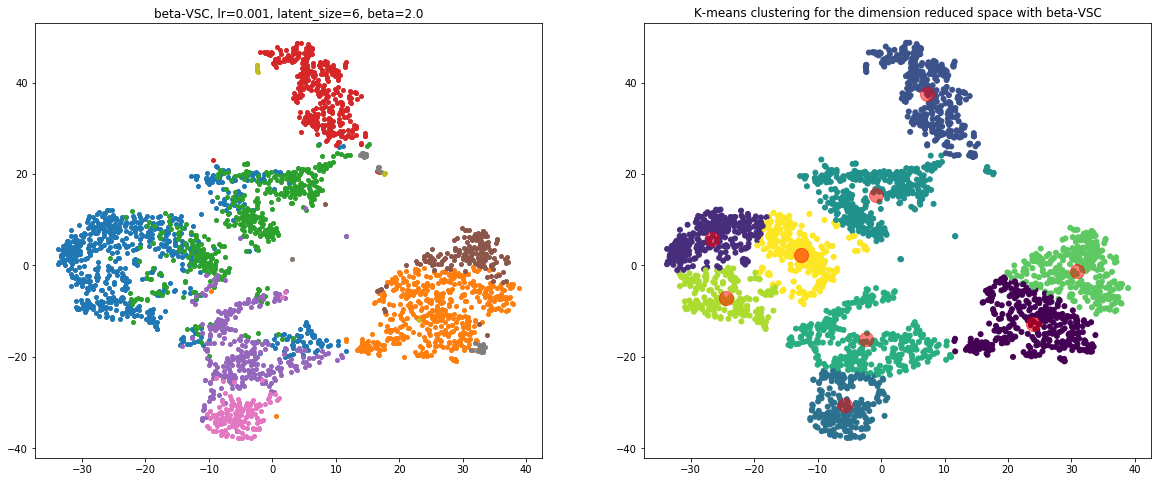

In [113]:
# Visualizations
title1 = "beta-VSC, lr=0.001, latent_size=6, beta=2.0"
title2 = 'K-means clustering for the dimension reduced space with beta-VSC'
plot_comparison(df, kmeans, xy, title1, title2)